# Pre-Model Training Foundations

In [ ]:
# Import dependencies
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt 

In [ ]:
# mounting Google Drive and setting path
from google.colab import drive
drive.mount('/content/drive')
path = 'drive/MyDrive/DS301 Final Project/data/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# reading in data
X = pd.read_csv(path + "calls_data.csv")
y = pd.read_csv(path + "calls_target.csv")

# splitting into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Additional Data Pre-Processing and Conversion

In [ ]:
# Convert training data into a numpy array
X_train_arr = X_train.values

In [ ]:
# Define function to convert training data into 3D array
def create_dataset(X, time_steps = 1):
  Xs = []
  for i in range(len(X) - time_steps):
    v = X[i:(i + time_steps)]
    Xs.append(v)
  return np.array(Xs)

In [ ]:
# Apply function to dataset with specific time steps
time_steps = 5
X_train_3D = create_dataset(X_train_arr, time_steps)

# Display new shape of training dataset
print(X_train_3D.shape)

(798079, 5, 29)


In [ ]:
# Convert test dataset features to 3-D array
X_test_3D = create_dataset(X_test, time_steps)
y_test_3D = create_dataset(y_test, time_steps)

# Training the Simple Recurrent Neural Network

In [ ]:
# Define RNN Model Architecture
model = Sequential()
model.add(SimpleRNN(50, return_sequences = True, input_shape = (X_train_3D.shape[1], X_train_3D.shape[2])))
model.add(SimpleRNN(50))
model.add(Dense(1))

# Compile the model
model.compile(loss = "mean_squared_error", optimizer = Adam(), metrics = ["mse"])

# Fit the model onto the dataset
history = model.fit(X_train_3D, y_train, epochs = 15, batch_size = 32, validation_split = 0.2)

Epoch 1/15
19952/19952 [==============================] - 146s 7ms/step - loss: 96075.7812 - mse: 96075.7812 - val_loss: 82139.8203 - val_mse: 82139.8203
Epoch 2/15
19952/19952 [==============================] - 140s 7ms/step - loss: 78238.6172 - mse: 78238.6172 - val_loss: 68419.4453 - val_mse: 68419.4453
Epoch 3/15
19952/19952 [==============================] - 148s 7ms/step - loss: 66078.6406 - mse: 66078.6406 - val_loss: 64009.5859 - val_mse: 64009.5859
Epoch 4/15
19952/19952 [==============================] - 137s 7ms/step - loss: 71196.8516 - mse: 71196.8516 - val_loss: 64734.8125 - val_mse: 64734.8125
Epoch 5/15
19952/19952 [==============================] - 134s 7ms/step - loss: 60446.5352 - mse: 60446.5352 - val_loss: 61191.2500 - val_mse: 61191.2500
Epoch 6/15
19952/19952 [==============================] - 131s 7ms/step - loss: 66479.4453 - mse: 66479.4453 - val_loss: 61801.4453 - val_mse: 61801.4453
Epoch 7/15
19952/19952 [==============================] - 140s 7ms/step - lo

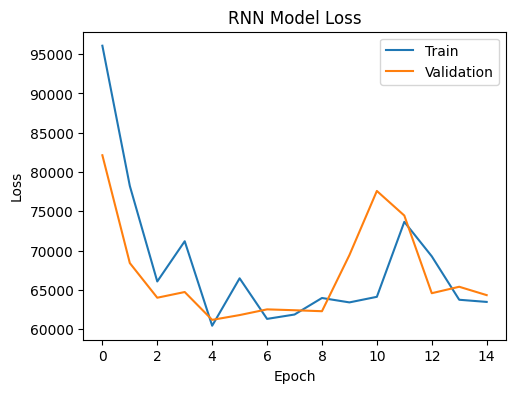

In [ ]:
# Plot RNN training and validation loss values 
plt.figure(figsize = (12,4))
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("RNN Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc = "upper right")
plt.show();

In [ ]:
# Evaluate trained RNN on test dataset
model.evaluate(X_test_3D, y_test_3D)

6235/6235 [==============================] - 18s 3ms/step - loss: 94936.9141 - mse: 94936.9141


[94936.9140625, 94936.9140625]

In [ ]:
# Save the model into Google Drive
model.save("drive/MyDrive/DS301 Final Project/models/rnn_calls")

# Training the LSTM RNN

In [ ]:
# Define LSTM Model Architecture
model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences = True, input_shape = (X_train_3D.shape[1], X_train_3D.shape[2])))
model_lstm.add(LSTM(50))
model_lstm.add(Dense(1))

# Compile the model
model_lstm.compile(loss = "mean_squared_error", optimizer = Adam(), metrics = ["mse"])

# Fit the model onto the dataset
history_lstm = model_lstm.fit(X_train_3D, y_train, epochs = 15, batch_size = 32, validation_split = 0.2)

Epoch 1/15
19952/19952 [==============================] - 254s 12ms/step - loss: 90947.6406 - mse: 90947.6406 - val_loss: 66032.3750 - val_mse: 66032.3750
Epoch 2/15
19952/19952 [==============================] - 247s 12ms/step - loss: 62090.9258 - mse: 62090.9258 - val_loss: 60299.7266 - val_mse: 60299.7266
Epoch 3/15
19952/19952 [==============================] - 248s 12ms/step - loss: 61518.1602 - mse: 61518.1602 - val_loss: 59516.7617 - val_mse: 59516.7617
Epoch 4/15
19952/19952 [==============================] - 249s 12ms/step - loss: 63651.8516 - mse: 63651.8516 - val_loss: 65031.0781 - val_mse: 65031.0781
Epoch 5/15
19952/19952 [==============================] - 252s 13ms/step - loss: 63346.7930 - mse: 63346.7930 - val_loss: 63883.9648 - val_mse: 63883.9648
Epoch 6/15
19952/19952 [==============================] - 247s 12ms/step - loss: 64570.5586 - mse: 64570.5586 - val_loss: 66159.6641 - val_mse: 66159.6641
Epoch 7/15
19952/19952 [==============================] - 256s 13ms/st

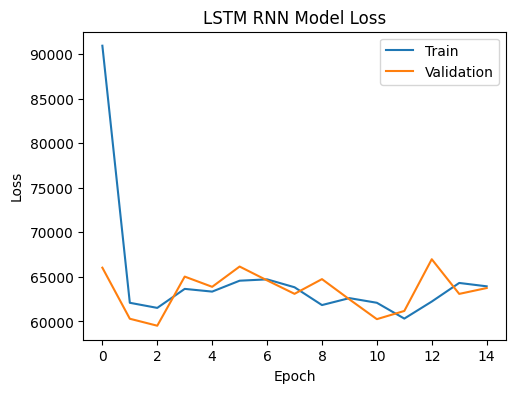

In [ ]:
# Plot LSTM training and validation loss values 
plt.figure(figsize = (12,4))
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history["loss"])
plt.plot(history_lstm.history["val_loss"])
plt.title("LSTM RNN Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc = "upper right")
plt.show();

In [ ]:
# Evaluate trained RNN on test dataset
model_lstm.evaluate(X_test_3D, y_test_3D)

6235/6235 [==============================] - 26s 4ms/step - loss: 93557.7734 - mse: 93557.7734


[93557.7734375, 93557.7734375]

In [ ]:
# Save the model into Google Drive
model_lstm.save("drive/MyDrive/DS301 Final Project/models/lstm_calls")

# Training the GRU RNN

In [ ]:
# Define the GRU RNN model architecture
model_gru = Sequential()
model_gru.add(GRU(50, return_sequences = True, input_shape = (X_train_3D.shape[1], X_train_3D.shape[2])))
model_gru.add(GRU(50))
model_gru.add(Dense(1))

# Compile the model
model_gru.compile(loss = "mean_squared_error", optimizer = Adam(), metrics = ["mse"])

# Fit the model
history_gru = model_gru.fit(X_train_3D, y_train, epochs = 15, batch_size = 32, validation_split = 0.2)

Epoch 1/15
19952/19952 [==============================] - 254s 12ms/step - loss: 89059.3359 - mse: 89059.3359 - val_loss: 65249.8203 - val_mse: 65249.8203
Epoch 2/15
19952/19952 [==============================] - 251s 13ms/step - loss: 62180.5430 - mse: 62180.5430 - val_loss: 64533.3750 - val_mse: 64533.3750
Epoch 3/15
19952/19952 [==============================] - 244s 12ms/step - loss: 62615.0508 - mse: 62615.0508 - val_loss: 63605.9922 - val_mse: 63605.9922
Epoch 4/15
19952/19952 [==============================] - 246s 12ms/step - loss: 62621.5586 - mse: 62621.5586 - val_loss: 61867.8672 - val_mse: 61867.8672
Epoch 5/15
19952/19952 [==============================] - 244s 12ms/step - loss: 65813.2578 - mse: 65813.2578 - val_loss: 72400.5234 - val_mse: 72400.5234
Epoch 6/15
19952/19952 [==============================] - 243s 12ms/step - loss: 63693.1758 - mse: 63693.1758 - val_loss: 60314.6992 - val_mse: 60314.6992
Epoch 7/15
19952/19952 [==============================] - 252s 13ms/st

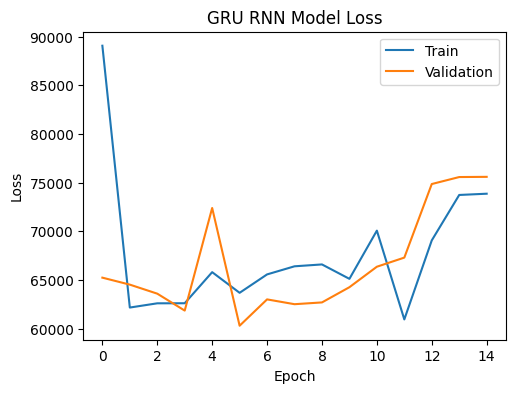

In [ ]:
# Plot GRU training and validation loss values 
plt.figure(figsize = (12,4))
plt.subplot(1, 2, 1)
plt.plot(history_gru.history["loss"])
plt.plot(history_gru.history["val_loss"])
plt.title("GRU RNN Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc = "upper right")
plt.show();

In [ ]:
# Evaluate trained GRU RNN on test dataset
model_gru.evaluate(X_test_3D, y_test_3D)

6235/6235 [==============================] - 26s 4ms/step - loss: 86404.0703 - mse: 86404.0703


[86404.0703125, 86404.0703125]

In [ ]:
# Save model into Google Drive
model_gru.save("drive/MyDrive/DS301 Final Project/models/gru_calls")